In [153]:
import sys 
sys.path.append('/home/pierre-edouard/Desktop/ICL/Git_LHCb')

import numpy as np 
import tensorflow.compat.v2 as tf 
import matplotlib.pyplot as plt
from scipy import stats
from scipy import interpolate
import time 
from tqdm import tqdm
import csv 

import b_meson_fit.signal as bmfs  
import b_meson_fit.coeffs as bmfc
import b_meson_fit as bmf 
from toy_minuit import toy
from test_iminuit import amplitude_latex_names ,amplitude_names, LaTex_labels , Standard_labels  , fix_array , fix_alphas , fix_one_alpha , fix_alpha_beta  ,fix_alpha_beta_gamma5
tf.enable_v2_behavior()

In [154]:

LaTex=LaTex_labels(amplitude_latex_names)
Title=Standard_labels(amplitude_names)
init_scheme   = bmf.coeffs.fit_initialization_same #fit_initialization_scheme_default #fit_initialization_any
init_scheme_1 = bmf.coeffs.fit_initialization_scheme_default
FIX=fix_array #fix_array #fix_alphas #fix_one_alpha #fix_alpha_beta #fix_alpha_beta_gamma1
N=10000  

toy1 = toy( model='SM')

toy1.generate( events = N , verbose = False )
A0=bmf.coeffs.fit(bmf.coeffs.fit_initialization_scheme_default , current_signal_model=toy1.model)
Coeff0=[A0[i].numpy() for i in range(len(A0))]





# Sanity check for alphas varying

In [160]:
FIX=fix_alphas

m , coef = toy1.minuitfit(Ncall=10000 , verbose=True , coefini=Coeff0 , fixed=FIX)
print(m.get_fmin())
B=[m.errors[i] for i in m.errors]
B=np.array(B)


 Coeffs used for MC: [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
Initial coeffs for minuit fit: [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]

  Fitted coefficients :  [-3.982360665405494, -0.15184344351291656, 6.818324565887451, 0.011534638429168211, -0.00182300

In [161]:
toy1.coeffs

[-4.1781025,
 -0.15184344,
 6.8183246,
 0.008585378,
 -0.0018230017,
 0.4660742,
 -0.23538125,
 -0.0043176315,
 8.003745,
 0.16564202,
 -0.013095878,
 -0.30668017,
 3.8864067,
 0.08526551,
 -8.197446,
 -0.09505176,
 0.007934013,
 -0.07297003,
 -0.4235836,
 0.027298994,
 -7.147451,
 0.0,
 0.0,
 0.0,
 7.202759,
 -0.2278163,
 9.89863,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0]

In [223]:
n=20
J=0
idx=48
Nmigrad=[100 , 500 , 1000 , 10000 ]

X=[]
for j in range(idx):
    x0=m.values[j]
    Dx=abs(x0-Coeff0[j])
    
    Dx_bis=2*abs(m.errors[j])
    
    
    DL=20*Dx
    DL_bis=10*Dx_bis
    
    lim_up=x0+DL/2
    lim_down=x0-DL/2
    
    lim_up_bis=x0+DL_bis/2
    lim_down_bis=x0-DL_bis/2

    X.append(np.linspace(lim_down_bis,lim_up_bis,5))
    
    if Coeff0[j] <lim_up_bis and Coeff0[j] >lim_down_bis:
        print('SANE')
    else :
        print('INSANE')
    print(lim_down_bis , lim_up_bis)

SANE
-7.177964361248899 -0.7867569695620893
SANE
-10.151843443512917 9.848156556487083
SANE
-3.181675434112549 16.81832456588745
SANE
-4.230833926510971 4.253903203369307
SANE
-10.001823001657613 9.998176998342387
SANE
-9.53392580151558 10.46607419848442
SANE
-6.265439115433961 6.032733128072739
SANE
-10.004317631479353 9.995682368520647
SANE
-1.9962549209594727 18.003745079040527
SANE
-12.569001912401731 13.2131422648986
SANE
-10.013095878064632 9.986904121935368
SANE
-10.306680172681808 9.693319827318192
SANE
0.5890928428446314 7.366438175888406
SANE
-9.914734490215778 10.085265509784222
SANE
-18.1974458694458 1.8025541305541992
SANE
-6.828436080604157 6.32786343336332
SANE
-9.9920659866184 10.0079340133816
SANE
-10.072970032691956 9.927029967308044
SANE
-1.1283854952993533 0.2801113017224041
SANE
-9.972701005637646 10.027298994362354
SANE
-17.147450923919678 2.8525490760803223
SANE
-10.0 10.0
SANE
-10.0 10.0
SANE
-10.0 10.0
SANE
-1.0563386154405574 15.288192422244189
SANE
-10.227816

In [224]:
A=bmf.coeffs.fit(init_scheme , current_signal_model=toy1.model)
Coefbis=[A[i].numpy() for i in range(len(A0))]
print(Coefbis)

[-0.46900797, -0.23680547, 7.325749, 0.009562557, -0.0012931335, 0.5913146, -0.030931532, -0.004651961, 7.2874703, 0.33179027, -0.03305769, -0.57317674, 7.170487, 0.14818712, -4.9679585, -0.056151077, 0.017114587, -0.017621748, -0.17055964, 0.025810694, -3.8881416, 0.0, 0.0, 0.0, 11.527168, -0.061994165, 15.7237425, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.32831526, 0.0, 0.0, 1.7267861, 0.0, 0.0, 1.4943621, 0.0, 0.0, 1.391588, 0.0, 0.0]


In [228]:
#print(X)

fx=fix_alphas
print(fx)



#print(A)
#idx=48
idx=48
#print(Coeff0)

BIGNLLTF=[]
BIGNLLM1=[]
BIGNLLM2=[]
BIGNLLM3=[]


A=bmf.coeffs.fit(init_scheme , current_signal_model=toy1.model)
A0=bmf.coeffs.fit(init_scheme_1 , current_signal_model=toy1.model)
Coefbis=[A[i].numpy() for i in range(len(A0))]
#print(Coefbis)


conVal=[]

for C in range(7):
    #print(X[C])
    print(LaTex[C])
    if fx[C]==0:
        
        a=X[C]
        BBYNLLTF=[]
        BBYNLLM1=[]
        BBYNLLM2=[]
        BBYNLLM3=[]
        
        
        
        Coeff0=[A0[i].numpy() for i in range(len(A0))]
        initCoeff=Coeff0     
        
        #keep migrad classes in memory 
        M=[]

        for j in range(len(X[C])):
            
            
            print( '\n', '##' , j+1 , '##')
            #print(X[C])
            
            fix=fx[:]
            fix[C]=1
            
            #print(Coeff0)
            

            
            initCoeff[C]=a[j]
            
            print(initCoeff)
            print(fix)
            
            
            #MINUIT OPT
            minuit , mCoeff = toy1.minuitfit(Ncall=1 , coefini=initCoeff , fixed=fix)
            nllM1=toy1.NLL
            M.append(minuit)
            BBYNLLM1.append(nllM1)
            print(nllM1)
            
            
            #TF OPT
            optimizer2 , tfCoeff2 =toy1.tf_fit( coefini=initCoeff , fixed=fix)
            nlltf=toy1.NLL
            BBYNLLTF.append(nlltf)
            print(nlltf)
            
            
        
        #optTFend , tfCoeffTFend =toy1.minuitfit( coefini=a , fixed=fx)
        #optimizerAll , tfCoeffAll =toy1.minuitfit(Ncall=10000, coefini=tfCoeffTFend , fixed=fx)
        #conVal.append([optimizerAll.values[C], optimizerAll.errors[C]])
        
        
        #interp profile 
        x=np.linspace(X[C][0] , X[C][-1], 500)
        fTF = interpolate.interp1d(X[C], np.asarray(BBYNLLTF) , kind='cubic')
        #def min and max 
        down=min(fTF(x))
        up=max(fTF(x))
        #find index of min 
        IDMIN = np.argwhere(np.diff(np.sign(fTF(x) - down))).flatten()
        print(IDMIN)
        
        C_migrad=Coeff0
        C_migrad[C]=x[IDMIN[0]]
        print(C_migrad)
        optimizerEND , tfCoeffEND =toy1.minuitfit( Ncall=10000 ,coefini=C_migrad , fixed=fix)
        print(optimizerEND.values ,optimizerEND.errors )
        conVal.append([optimizerEND.values[C] , optimizerAll.errors[C]])
        
        BIGNLLTF.append(BBYNLLTF)
        BIGNLLM1.append(BBYNLLM1)   
        
        
#optimizer2 , tfCoeff2 =toy1.tf_fit(Ncall=Nmigrad[1], coefini=X , fixed=fix)

[0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
$\alpha$(Re($A_{\parallel}^L$))

 ## 1 ##
[-7.177964361248899, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
[1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
tf.Tensor(48246.66, shape=(), dtype=float32)
tf.Tensor(48067.7, shape=(), dtype=float32)

 ## 2 ##
[-5.580162513327196, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, 

tf.Tensor(48063.984, shape=(), dtype=float32)
tf.Tensor(48017.89, shape=(), dtype=float32)

 ## 5 ##
[-4.1781025, -0.15184344, 6.8183246, 4.253903203369307, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
[0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
tf.Tensor(48758.65, shape=(), dtype=float32)
tf.Tensor(48428.812, shape=(), dtype=float32)
[249 250]
[-4.1781025, -0.15184344, 6.8183246, 0.0030328978180662602, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003

tf.Tensor(50318.113, shape=(), dtype=float32)
tf.Tensor(48658.05, shape=(), dtype=float32)

 ## 2 ##
[-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, -6.123465868076648, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
[0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
tf.Tensor(48406.668, shape=(), dtype=float32)
tf.Tensor(48118.906, shape=(), dtype=float32)

 ## 3 ##
[-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.3220701762484346, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.0729700

In [229]:
# save data !!!!!
print(len(X[C]))

print(conVal)
for j in range(len(m.values)):
    print('MINUIT FIT' , m.values[j] , m.errors[j])

5
[[-3.988764762878418, 0.17405091362777467], [0.0030328978318721056, 0.45513629967000463], [0.06848927587270737, 0.580816030820281], [0.14123348891735077, 2.0187006280554587]]
MINUIT FIT -3.982360665405494 0.3195603695843405
MINUIT FIT -0.15184344351291656 1.0
MINUIT FIT 6.818324565887451 1.0
MINUIT FIT 0.011534638429168211 0.4242368564940139
MINUIT FIT -0.0018230016576126218 1.0
MINUIT FIT 0.4660741984844208 1.0
MINUIT FIT -0.11635299368061089 0.614908612175335
MINUIT FIT -0.004317631479352713 1.0
MINUIT FIT 8.003745079040527 1.0
MINUIT FIT 0.3220701762484343 1.2891072088650166
MINUIT FIT -0.013095878064632416 1.0
MINUIT FIT -0.30668017268180847 1.0
MINUIT FIT 3.9777655093665185 0.3388672666521887
MINUIT FIT 0.08526550978422165 1.0
MINUIT FIT -8.1974458694458 1.0
MINUIT FIT -0.2502863236204184 0.6578149756983739
MINUIT FIT 0.00793401338160038 1.0
MINUIT FIT -0.07297003269195557 1.0
MINUIT FIT -0.4241370967884746 0.07042483985108787
MINUIT FIT 0.02729899436235428 1.0
MINUIT FIT -7.147

[249 250]
[-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.1412334936421189, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
-4.1781025



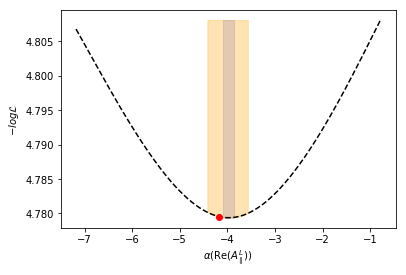

[249 250]
[-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.1412334936421189, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
0.008585378



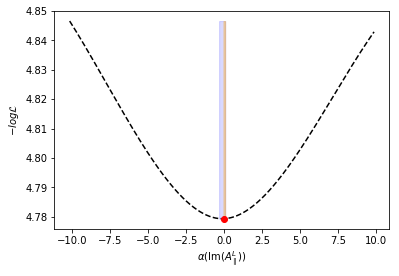

[257 258]
[-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.1412334936421189, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
-0.23538125



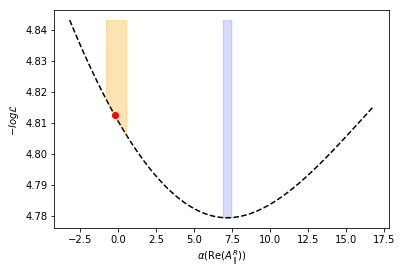

[246 247]
[-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.1412334936421189, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
0.1412334936421189



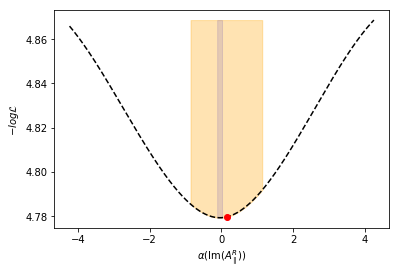

In [230]:
k=0

for j in range(len(fx)):
    
    
    if fx[j]==0 and k < len(BIGNLLM1):
        fig, ax = plt.subplots()

        yM1=np.asarray(BIGNLLM1[k])/N
        yTF=np.asarray(BIGNLLTF[k])/N 


        #plt.plot( yM1)
        #plt.plot(yTF)
        #print(X[0])
        x=np.linspace(X[k][0] , X[k][-1], 500)
        fM1 = interpolate.interp1d(X[k], yM1 , kind='cubic')
        fTF = interpolate.interp1d(X[k], yTF , kind='cubic')
        

        plt.plot( x , fTF(x) , 'k--')

        plt.xlabel(r'$\beta $')


        sig=0.5/N
        down = min(fTF(x))
        up = max(fTF(x))

        #print(down)

        #ax.fill_between(x, fTF(x), down+1*sig , where= down+1*sig > fTF(x) , alpha=0.4, color='red', label=r' $\sigma$')
        #ax.fill_between(x, fTF(x), down+2*sig , where= down+2*sig > fTF(x) , alpha=0.2, color='orange' , label=r' 2$\sigma$')
        #ax.fill_between(x, fTF(x), down+3*sig , where= down+3*sig > fTF(x) , alpha=0.1, color='yellow' , label=r' 3$\sigma$')
        ylim= down+1*sig
        ID = np.argwhere(np.diff(np.sign(fTF(x) - ylim))).flatten()

        
        
        #print(ID)   
        
        if len(ID) is 2:
            xleft=x[ID[0]]

            xright=x[ID[1]]
            XX=np.linspace(xleft,xright)
            ax.fill_between(XX , fTF(XX), up , alpha=0.15 , color='b', label=r'$68\%$ CI')
        if toy1.coeffs[j] < max(x) and toy1.coeffs[j] >min(x):
            plt.plot(toy1.coeffs[j] ,fTF(toy1.coeffs[j]) , 'or')

        
        
        IDMIN = np.argwhere(np.diff(np.sign(fTF(x) - down))).flatten()
        print(IDMIN)
        Xmin=IDMIN[0]
        Coefbis=[A[i].numpy() for i in range(len(A0))]
        print(Coeff0)      
        
        
        
        
        xconvleft=conVal[k][0]-conVal[k][1]
        xconvright=conVal[k][0]+conVal[k][1]
        XXconv=np.linspace(xconvleft,xconvright)
        #ax.fill_between(XXconv , fTF(XXconv),up   , alpha=0.3 , color='orange' , label=r'$68\%$ CI')
        
        
        xconvleftB=optimizerEND.values[j]-optimizerEND.errors[j]
        xconvrightB=optimizerEND.values[j]+optimizerEND.errors[j]
        XXconvB=np.linspace(xconvleftB,xconvrightB)        
        ax.fill_between(XXconvB , fTF(XXconvB),up   , alpha=0.3 , color='orange' , label=r'$68\%$ CI')
        
        
        print(Coeff0[j])
        print()
        plt.xlabel(LaTex[j])
        plt.ylabel(r'$-log \mathcal{L}$')
        plt.show()
        #plt.legend()
        k+=1

#print(toy1.coeffs[0])
#print(conVal)


#b41f21
[29]


IndexError: index 1 is out of bounds for axis 0 with size 1

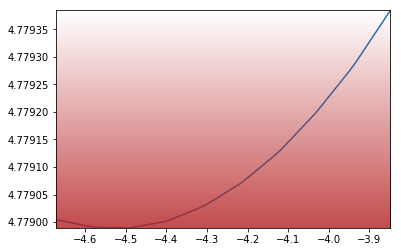

In [11]:
# stolen from https://stackoverflow.com/questions/29321835/is-it-possible-to-get-color-gradients-under-curve-in-matplotlib lol
import matplotlib.colors as mcolors
from matplotlib.patches import Polygon

def gradient_fill(x, y, fill_color=None, ax=None, **kwargs):
    """
    Plot a line with a linear alpha gradient filled beneath it.

    Parameters
    ----------
    x, y : array-like
        The data values of the line.
    fill_color : a matplotlib color specifier (string, tuple) or None
        The color for the fill. If None, the color of the line will be used.
    ax : a matplotlib Axes instance
        The axes to plot on. If None, the current pyplot axes will be used.
    Additional arguments are passed on to matplotlib's ``plot`` function.

    Returns
    -------
    line : a Line2D instance
        The line plotted.
    im : an AxesImage instance
        The transparent gradient clipped to just the area beneath the curve.
    """
    if ax is None:
        ax = plt.gca()

    line, = ax.plot(x, y)
    if fill_color is None:
        fill_color = line.get_color()
        
    fill_color='#b41f21'
    print(fill_color)
    zorder = line.get_zorder()
    alpha = line.get_alpha()
    alpha = 0.8 if alpha is None else alpha

    z = np.empty((100, 1, 4), dtype=float)
    rgb = mcolors.colorConverter.to_rgb(fill_color)
    z[:,:,:3] = rgb
    z[:,:,-1] = np.linspace(0, alpha, 100)[:,None]

    xmin, xmax, ymin, ymax = x.min(), x.max(), y.min(), y.max()
    yint=ymax-fTF(xmin)
    im = ax.imshow(z, aspect='auto', extent=[xmin, xmax, ymin, ymax],
                   origin='upper', zorder=zorder )
    

    ylim=ymin+2*sig
    idx = np.argwhere(np.diff(np.sign(fTF(x) - ylim))).flatten()
    print(idx)   
    #plt.plot(x[idx[0]] , y[idx[0]] , 'or')
    #plt.plot(x[idx[1]] , y[idx[1]] , 'or')
    
    
    xleft = x[idx[0]]
    xright = x[idx[1]]

    
    yeff=y[idx[0]: idx[1]]
    xeff=x[idx[0]: idx[1]]
    
    
    xy = np.column_stack([xeff, yeff])
    xy = np.vstack([[xleft, ylim], xy, [xright, ylim]])
    clip_path = Polygon(xy , facecolor='none', edgecolor='none', closed=True)
    print(clip_path)
    ax.add_patch(clip_path)
    im.set_clip_path(clip_path)

    ax.autoscale(False)
    return line, im


t=fTF(x)
gradient_fill(x , t)



plt.show()

In [169]:
print(x)
NbData = len(x)
MaxBL = [[MaxBL] * NbData for MaxBL in range(100)]
Max = [np.asarray(MaxBL[x]) for x in range(len(x))]

for x in range (50, 100):
   plt.fill_between(x, Max[x], fTF(x), where=yData >Max[x], facecolor='red', alpha=0.02)


50


TypeError: object of type 'int' has no len()

In [ ]:
a=[2 ,3 7 , 9 , 0  , 8 , 0]
